# User Story 2
- User utilizes the CurrentExp class to initialize a whole experiment as an object
- User fills out the Blueprint with the PARAMETERS and deliver it to the class.
- Users algorithm choice is MR-Hydra. 
- The algorithm is applied on the datasets Beef.
- Lastly, the run_single_pipeline() function is executed to run the a whole experiment as a one liner

In [1]:
import os
from pathlib import Path
import warnings
from tsml_eval.publications.y2023.tsc_bakeoff.run_experiments import _set_bakeoff_classifier


#---- Ensure cwd = root_directory
cwd = Path.cwd()
if cwd.name == "notebooks":
    os.chdir(cwd.parent)

#---- Own module imports
from src.models.classifierWrapper import BakeoffClassifier
from src.data_handlers.basic_func import dataset_provider,dataset_overview, overview_of_bakeoff_cl
from src.utils.utilizations import load_and_expand_yaml, get_frames_and_names, setup_logger
from src.visuals.visualizations import visualize_acc_decr, visualize_trace_M, visualize_acc_decr_multiple
from src.current_experiment import Experiment



warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
logger = setup_logger("Basic_Func_Logger")
logger.info(f"Working directory set to:{os.getcwd()}")


[2025-10-28 13:35:57] INFO - Custom-named logger active.
[2025-10-28 13:35:57] INFO - Custom-named logger active.
[2025-10-28 13:35:57] INFO - apply_dca.py logger active
[2025-10-28 13:35:57] INFO - Working directory set to:/Users/david/Documents/Studium D&E/Applied AI/David_MA


In [2]:
h = overview_of_bakeoff_cl(show_all_possible_names=True)

{'distance_based': ['1NN-DTW', 'GRAIL'], 'feature_based': ['Catch22', 'FreshPRINCE', 'TSFresh', 'Signatures'], 'shapelet_based': ['STC', 'RDST', 'RSF', 'MrSQM'], 'interval_based': ['R-STSF', 'RISE', 'TSF', 'CIF', 'STSF', 'DrCIF', 'QUANT'], 'dictionary_based': ['BOSS', 'cBOSS', 'TDE', 'WEASEL', 'WEASEL_V2'], 'convolution_based': ['ROCKET', 'MiniROCKET', 'MultiROCKET', 'Arsenal', 'Hydra', 'MR-Hydra'], 'deep_learning': ['CNN', 'ResNet', 'InceptionTime', 'H-InceptionTime', 'LITETime'], 'hybrid': ['HC1', 'HC2', 'RIST']}
classifier names can be written in several different naming conventions.
Here is a list of possible alternative names for the accesible bakeoff classifiers
['KNeighborsTimeSeriesClassifier', 'dtw', '1nn-dtw']
['GRAILClassifier', 'grail']
['Catch22Classifier', 'catch22']
['FreshPRINCEClassifier', 'freshprince']
['TSFreshClassifier', 'tsfresh']
['SignatureClassifier', 'signatures']
['ShapeletTransformClassifier', 'stc', 'stc-2hour']
['RDSTClassifier', 'rdst']
['RandomShapeletF

In [3]:
configuration = load_and_expand_yaml("experiments/experiment_Car15.yaml")
configuration_2 = load_and_expand_yaml("experiments/experiment_2.yaml")
configuration_3 = load_and_expand_yaml("experiments/experiment_3.yaml")

# Load an explicit config and initialize the experiment
experiment = Experiment(config=configuration[0], base_path="112UCRFolds", results_root="simulation_results")

[2025-10-28 13:36:17] INFO - Loading and expanding YAML configuration from: experiments/experiment_Car15.yaml
[2025-10-28 13:36:17] INFO - YAML configuration expanded into 1 configurations
[2025-10-28 13:36:17] INFO - Loading and expanding YAML configuration from: experiments/experiment_2.yaml
[2025-10-28 13:36:17] INFO - YAML configuration expanded into 30 configurations
[2025-10-28 13:36:17] INFO - Loading and expanding YAML configuration from: experiments/experiment_3.yaml
[2025-10-28 13:36:17] INFO - YAML configuration expanded into 93 configurations
[2025-10-28 13:36:17] INFO - X_train             : (60, 1, 577)
[2025-10-28 13:36:17] INFO - y_train             : (60,)
[2025-10-28 13:36:17] INFO - X_test              : (60, 1, 577)
[2025-10-28 13:36:17] INFO - y_test              : (60,)
[2025-10-28 13:36:17] INFO - X_train_small       : (60, 1, 577)
[2025-10-28 13:36:17] INFO - y_train_small       : (60,)
[2025-10-28 13:36:17] INFO - X_test_small        : (60, 1, 577)
[2025-10-28 

[2025-10-28 13:36:21] INFO - Run Experiment
[2025-10-28 13:36:21] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-10-28 13:36:21] INFO - requested_instance_step = 6.0 will be transformed into 6
[2025-10-28 13:36:21] INFO - requested_percentage_step = 10 % || transformed into 10.0 %
[2025-10-28 13:36:21] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-10-28 13:36:21] INFO - stop value is 100% --> set to number of instances
[2025-10-28 13:36:21] WARNING - Could not assign GPU: NVML Shared Library Not Found
[2025-10-28 13:36:21] INFO - label_names: ['1' '2' '3' '4']
[2025-10-28 13:36:21] INFO - Current Label Error Strategy: DEFAULT: leV1
[2025-10-28 13:36:21] INFO - The p_vector for the current_experiment: [0.25, 0.25, 0.25, 0.25]
[2025-10-28 13:36:21] INFO - Searching inside simulation_results/MINI-ROCKET/Car for results
[2025-10-28 13:36:21] INFO - Looking for files matching pattern: leV1_0_(\d+)_(\d+)_(\d+) with 

Cap reached


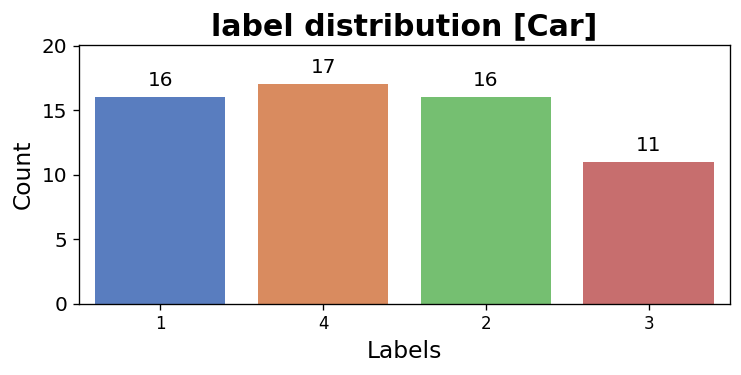

In [4]:
# Use experiment class methods 
experiment.dataset_overview()
experiment.run_experiment()

In [5]:
experiment.df_

,step,LE_instances,LE_relative,accuracy,train_time,eval_time,y_train_history,y_pred,y_pred_prob
0,1,0,0.000000,0.916667,0.0951,0.0734,"[1, 4, 2, 1, 2, 4, 1, 4, 4, 4, 1, 2, 3, 1, 2, ...","[4, 3, 2, 3, 4, 3, 4, 4, 2, 3, 1, 1, 1, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], [..."
1,2,1,0.016667,0.900000,0.1023,0.1042,"[1, 4, 2, 1, 2, 4, 1, 4, 4, 4, 1, 2, 3, 1, 2, ...","[4, 3, 2, 3, 4, 3, 4, 4, 2, 3, 1, 1, 1, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], [..."
2,3,2,0.033333,0.833333,0.1108,0.0788,"[1, 4, 2, 1, 2, 4, 1, 4, 4, 4, 1, 2, 2, 1, 2, ...","[4, 3, 2, 3, 4, 3, 4, 4, 2, 3, 1, 1, 1, 2, 2, ...","[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], [..."
3,4,3,0.050000,0.833333,0.1013,0.1044,"[1, 4, 2, 1, 2, 4, 1, 4, 4, 4, 1, 2, 2, 1, 2, ...","[4, 3, 2, 3, 4, 3, 4, 4, 2, 3, 1, 1, 1, 2, 3, ...","[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], [..."
4,5,4,0.066667,0.833333,0.1057,0.0754,"[1, 4, 2, 1, 2, 4, 1, 4, 4, 4, 1, 2, 2, 1, 2, ...","[4, 3, 2, 3, 4, 3, 4, 4, 2, 3, 1, 1, 1, 2, 3, ...","[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], [..."
...,...,...,...,...,...,...,...,...,...
56,57,56,0.933333,0.200000,0.1295,0.1298,"[2, 3, 4, 4, 1, 1, 2, 4, 3, 3, 4, 4, 2, 2, 4, ...","[3, 2, 4, 4, 3, 4, 1, 2, 3, 4, 2, 3, 2, 1, 4, ...","[[0.0, 0.0, 1.0, 0.0], [0.0, 1.0, 0.0, 0.0], [..."
57,58,57,0.950000,0.150000,0.0919,0.1142,"[2, 3, 4, 4, 1, 1, 2, 3, 3, 3, 4, 4, 2, 2, 4, ...","[3, 2, 4, 4, 3, 4, 1, 2, 3, 4, 2, 3, 2, 1, 3, ...","[[0.0, 0.0, 1.0, 0.0], [0.0, 1.0, 0.0, 0.0], [..."
58,59,58,0.966667,0.133333,0.0991,0.0689,"[2, 3, 4, 4, 1, 1, 2, 3, 3, 3, 4, 4, 2, 2, 4, ...","[3, 2, 4, 4, 3, 4, 1, 2, 3, 4, 2, 3, 2, 1, 3, ...","[[0.0, 0.0, 1.0, 0.0], [0.0, 1.0, 0.0, 0.0], [..."
59,60,59,0.983333,0.083333,0.1051,0.0765,"[2, 3, 4, 4, 1, 1, 2, 3, 3, 3, 4, 4, 2, 2, 4, ...","[3, 2, 4, 4, 3, 4, 1, 2, 3, 4, 2, 3, 2, 1, 3, ...","[[0.0, 0.0, 1.0, 0.0], [0.0, 1.0, 0.0, 0.0], [..."


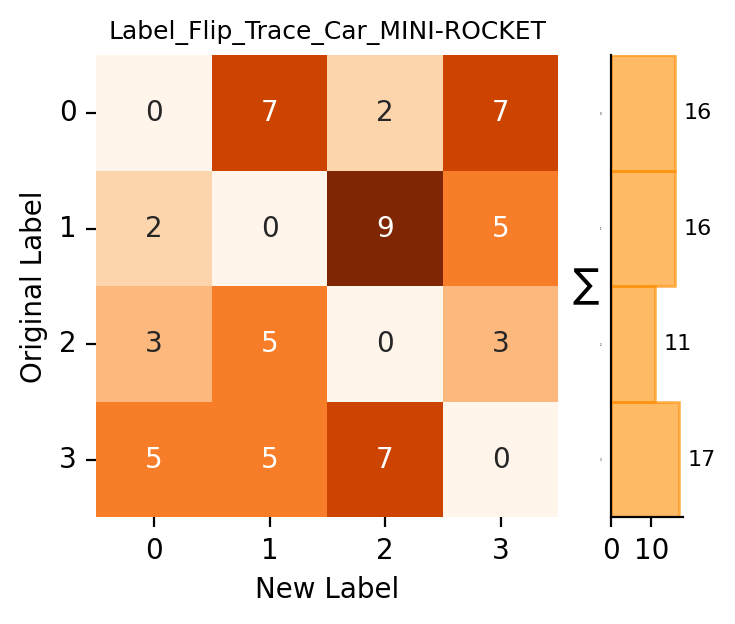

In [6]:
experiment.trace_M()

[2025-10-28 13:36:36] INFO - X_train             : (500, 1, 128)
[2025-10-28 13:36:36] INFO - y_train             : (500,)
[2025-10-28 13:36:36] INFO - X_test              : (625, 1, 128)
[2025-10-28 13:36:36] INFO - y_test              : (625,)
[2025-10-28 13:36:36] INFO - X_train_small       : (500, 1, 128)
[2025-10-28 13:36:36] INFO - y_train_small       : (500,)
[2025-10-28 13:36:36] INFO - X_test_small        : (625, 1, 128)
[2025-10-28 13:36:36] INFO - y_test_small        : (625,)
[2025-10-28 13:36:36] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-10-28 13:36:36] INFO - Using 6 jobs for classifier training and prediction
[2025-10-28 13:36:36] INFO - Initializing Exp with dataset: SwedishLeaf, classifier: MR-Hydra, strategy: LabelErrors
[2025-10-28 13:36:36] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 5}


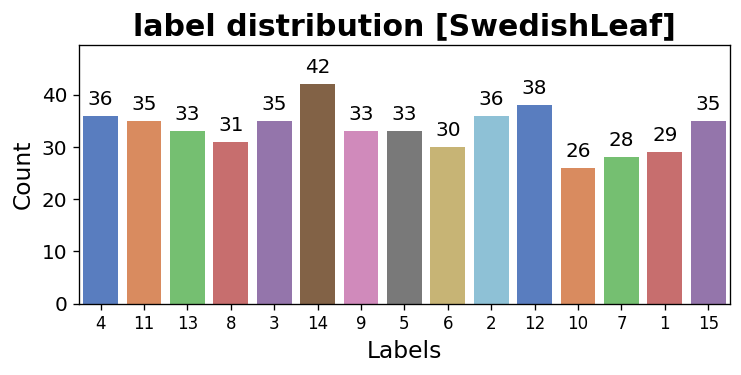

In [7]:
experiment_ = Experiment(config = configuration_2[0], base_path="112UCRFolds", results_root="simulation_results")
experiment_.dataset_overview()

In [8]:
#For running multiple experiments create an experimental_dict 

experimental_dict = {}
my_config = configuration_2[0:6]

for i_, exp_conf in enumerate(my_config):
    current_exp = Experiment(config=exp_conf, base_path="112UCRFolds", results_root="simulation_results")
    exp_name = "experiment_"+str(i_)
    current_exp.run_experiment()
    experimental_dict[exp_name]=[exp_conf, current_exp]

[2025-10-28 13:36:49] INFO - X_train             : (500, 1, 128)
[2025-10-28 13:36:49] INFO - y_train             : (500,)
[2025-10-28 13:36:49] INFO - X_test              : (625, 1, 128)
[2025-10-28 13:36:49] INFO - y_test              : (625,)
[2025-10-28 13:36:49] INFO - X_train_small       : (500, 1, 128)
[2025-10-28 13:36:49] INFO - y_train_small       : (500,)
[2025-10-28 13:36:49] INFO - X_test_small        : (625, 1, 128)
[2025-10-28 13:36:49] INFO - y_test_small        : (625,)
[2025-10-28 13:36:49] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-10-28 13:36:49] INFO - Using 6 jobs for classifier training and prediction
[2025-10-28 13:36:49] INFO - Initializing Exp with dataset: SwedishLeaf, classifier: MR-Hydra, strategy: LabelErrors
[2025-10-28 13:36:49] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 5}
[2025-10-28 13:36:49] INFO - Run

Cap reached
Cap reached


[2025-10-28 13:36:49] INFO - Initializing Exp with dataset: SwedishLeaf, classifier: Weasel-D, strategy: LabelErrors
[2025-10-28 13:36:49] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 5}
[2025-10-28 13:36:49] INFO - Run Experiment
[2025-10-28 13:36:49] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-10-28 13:36:49] INFO - requested_instance_step = 25.0 will be transformed into 25
[2025-10-28 13:36:49] INFO - requested_percentage_step = 5 % || transformed into 5.0 %
[2025-10-28 13:36:49] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-10-28 13:36:49] INFO - stop value is 100% --> set to number of instances
[2025-10-28 13:36:49] WARNING - Could not assign GPU: NVML Shared Library Not Found
[2025-10-28 13:36:49] INFO - label_names: ['1' '10' '11' '12' '13' '14' '15' '2' '3' '4' '5' '6' '7' '8' '9']
[2025-10

Cap reached
Cap reached
Cap reached
Cap reached


In [9]:
experimental_dict.keys()

dict_keys(['experiment_0', 'experiment_1', 'experiment_2', 'experiment_3', 'experiment_4', 'experiment_5'])

In [10]:
#The experimental_dict has every experiment numbered as key names.
#Once accesed it returns the configuration [0] or the Experiment Class object [1]:

experimental_dict["experiment_1"][0]

{'DATASET_NAME': 'SwedishLeaf',
 'CLASSIFIER_NAME': 'Quant',
 'REDUCTION_F': 1,
 'RANDOM_S': 0,
 'DCA': {'type': 'LabelErrors',
  'DoE_param': {'le_strategy': 'leV1',
   'p_vec': 'None',
   'random_seed': 0,
   'start': 0,
   'stop': 100,
   'step': 5}}}

In [11]:
#You can use every method defined in the Experiment() Class like acessing the respective DataFrame object:
experimental_dict["experiment_1"][1].df_.iloc[15:20]

,step,LE_instances,LE_relative,accuracy,train_time,eval_time,y_train_history,y_pred,y_pred_prob
15,16,150,0.30,0.9424,2.0230,0.2995,"[12, 11, 13, 4, 13, 3, 5, 14, 6, 11, 13, 8, 9,...","[10, 11, 8, 12, 14, 1, 5, 11, 13, 6, 1, 15, 14...","[[0.0, 0.515, 0.08, 0.065, 0.055, 0.025, 0.0, ..."
16,17,160,0.32,0.9264,2.0421,0.2991,"[12, 11, 13, 4, 13, 3, 5, 14, 6, 11, 13, 8, 9,...","[10, 11, 8, 12, 14, 1, 5, 11, 13, 6, 3, 15, 14...","[[0.01, 0.515, 0.095, 0.1, 0.055, 0.02, 0.005,..."
17,18,170,0.34,0.9280,2.0830,0.2990,"[12, 11, 13, 4, 13, 3, 5, 14, 6, 11, 13, 8, 9,...","[10, 11, 8, 12, 14, 1, 5, 11, 13, 6, 3, 15, 14...","[[0.005, 0.515, 0.065, 0.07, 0.03, 0.015, 0.01..."
18,19,180,0.36,0.9152,2.1154,0.2998,"[12, 11, 13, 4, 13, 3, 5, 14, 6, 11, 13, 8, 9,...","[10, 11, 8, 12, 14, 1, 5, 11, 13, 6, 9, 15, 14...","[[0.01, 0.49, 0.11, 0.065, 0.05, 0.02, 0.01, 0..."
19,20,190,0.38,0.9104,2.1519,0.2994,"[12, 11, 13, 4, 13, 3, 5, 14, 6, 11, 13, 8, 9,...","[10, 11, 8, 12, 14, 1, 5, 11, 13, 6, 9, 15, 14...","[[0.0, 0.375, 0.06, 0.105, 0.055, 0.01, 0.02, ..."


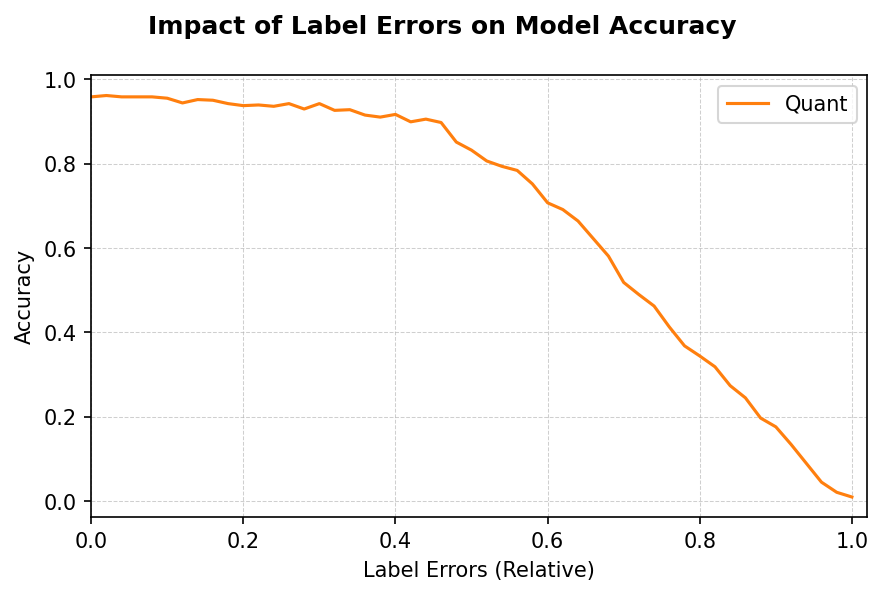

In [12]:
experimental_dict["experiment_1"][1].acc_decr()
#or use the function directly
#visualize_acc_decr(experimental_dict["experiment_1"][1].df_, first="relative", cl_="MR-Hydra")

In [13]:
# With get_frames_and_names the exp_dict will be unpacked in the
#1 DataFrames, 2 ClassifierNames, 3Dataset_name, 4 ClassifierName_withSeed (if there are multiple RS chosen)
dfs_, clfs_, ds_names_, clfs_seed_ = get_frames_and_names(exp_dict = experimental_dict)

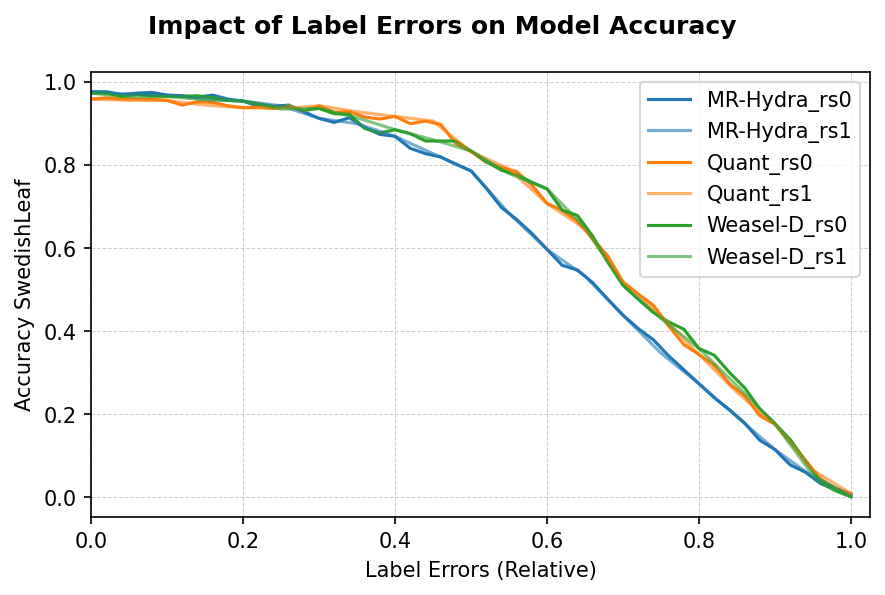

In [14]:
visualize_acc_decr_multiple(multiple_df=dfs_, vis_names_=clfs_seed_, ds_="SwedishLeaf", filename_="acc_decr", save_fig=False, exp_folder=None)

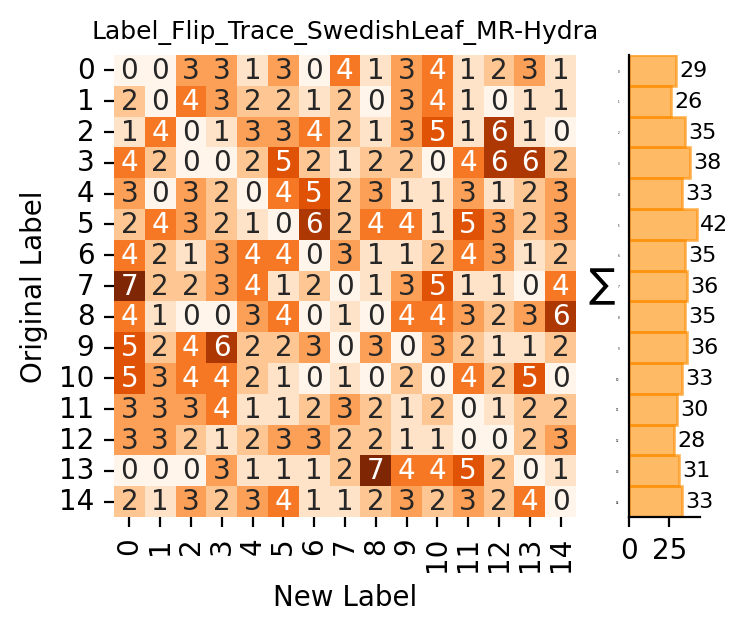

In [15]:
experimental_dict["experiment_0"][1].trace_M()

In [ ]:
from NoTrack.pipeline_builder import run_single_pipeline
DATASET_NAME = "Car"                   #should be in DS_list
CLASSIFIER_NAME = "MR-Hydra"            #should be in cl_ names
REDUCTION_F = 1                         #optional. only for large datasets
RANDOM_S = 0                            #Random Seed for everything except the DCA
DoE_PARAM = {"random_seed":0,"start":0,"stop":90,"step":1}   #stop = max 90% of test_set_size, step=1-10 
EXP_FOLD = "simulation_results/"                            #respect folder structure
SAVE_FILES = True 
DATA_VIS  = False

experiment_args = [DATASET_NAME, CLASSIFIER_NAME, REDUCTION_F,RANDOM_S, DoE_PARAM, EXP_FOLD, SAVE_FILES]

results = run_single_pipeline(*experiment_args)

[2025-10-16 16:18:56] INFO - X_train             : (60, 1, 577)
[2025-10-16 16:18:56] INFO - y_train             : (60,)
[2025-10-16 16:18:56] INFO - X_test              : (60, 1, 577)
[2025-10-16 16:18:56] INFO - y_test              : (60,)
[2025-10-16 16:18:56] INFO - X_train_small       : (60, 1, 577)
[2025-10-16 16:18:56] INFO - y_train_small       : (60,)
[2025-10-16 16:18:56] INFO - X_test_small        : (60, 1, 577)
[2025-10-16 16:18:56] INFO - y_test_small        : (60,)
[2025-10-16 16:18:56] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-10-16 16:18:56] INFO - requested_instance_step = 0.6 will be transformed into 1
[2025-10-16 16:18:56] INFO - requested_percentage_step = 1 % || transformed into 1.6667 %
[2025-10-16 16:18:56] WARNING - Could not assign GPU: NVML Shared Library Not Found


KeyError: 'le_strategy'